## Loan Approval Prediction & Credit Risk Analysis


### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Data Loading

In [2]:
data_df = pd.read_csv('Loan.csv')
data_df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


### Data Understanding & Cleaning
#### The results below show that th dataset is of the highest Quality as it has no nans, duplicates and appropriate data fields types. However, dataset description shows some outliers present in the data. Also the label class in imbalanced showing only 23.9% loan approval rate 

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [4]:
print(data_df.isna().sum()) # Number of missing values

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [5]:
data_df.describe() ## Dataset Description

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [6]:
data_df.select_dtypes(include='object').columns ## columns of object type


Index(['ApplicationDate', 'EmploymentStatus', 'EducationLevel',
       'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [7]:
data_df.select_dtypes(include=['float64','int64']).columns ## columns of numerical type


Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
       'RiskScore'],
      dtype='object')

In [8]:
data_df.duplicated().sum() ## checking for duplicate rows

np.int64(0)

### Exploratory Data Analysis
#### 

#### 1. Loan Approval Rate based on different Sectors


In [9]:
# Overall Loan Approval Rate
approval_rate = data_df['LoanApproved'].mean()
print(f"Overall Loan Approval Rate: {approval_rate:.2%}")


Overall Loan Approval Rate: 23.90%


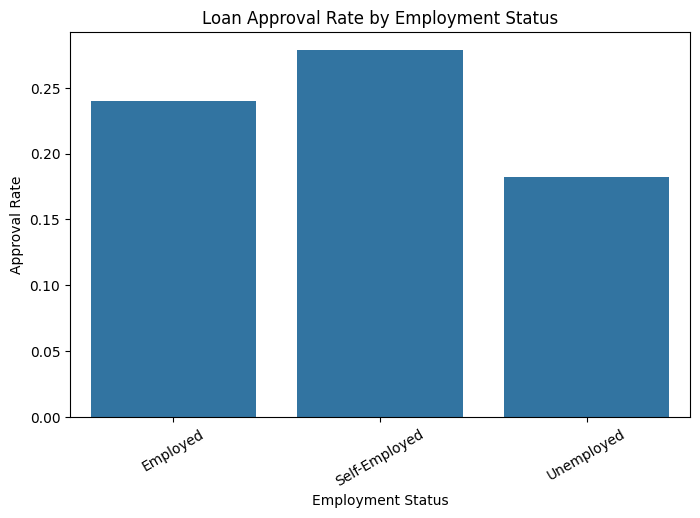

In [10]:
approval_emp = (
    data_df
    .groupby('EmploymentStatus')['LoanApproved']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=approval_emp,
    x='EmploymentStatus',
    y='LoanApproved'
)
plt.title('Loan Approval Rate by Employment Status')
plt.ylabel('Approval Rate')
plt.xlabel('Employment Status')
plt.xticks(rotation=30)
plt.show()


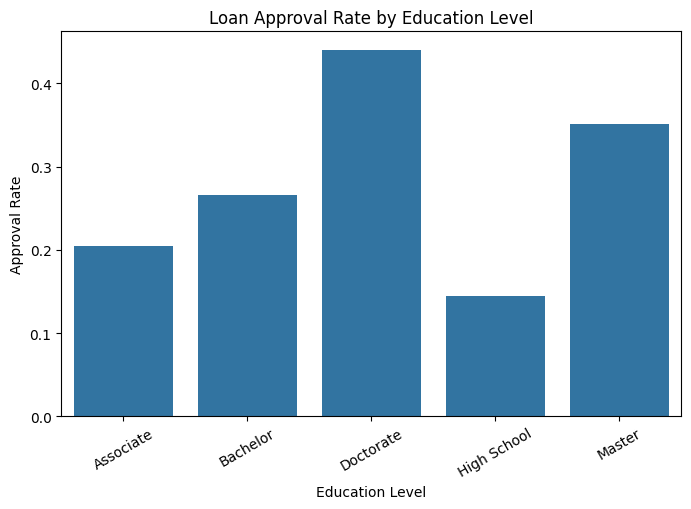

In [11]:
approval=(
    data_df.groupby('EducationLevel')['LoanApproved'].mean().reset_index())

plt.figure(figsize=(8,5))
sns.barplot(data=approval,x='EducationLevel',y='LoanApproved')
plt.title('Loan Approval Rate by Education Level')
plt.ylabel('Approval Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=30)
plt.show()

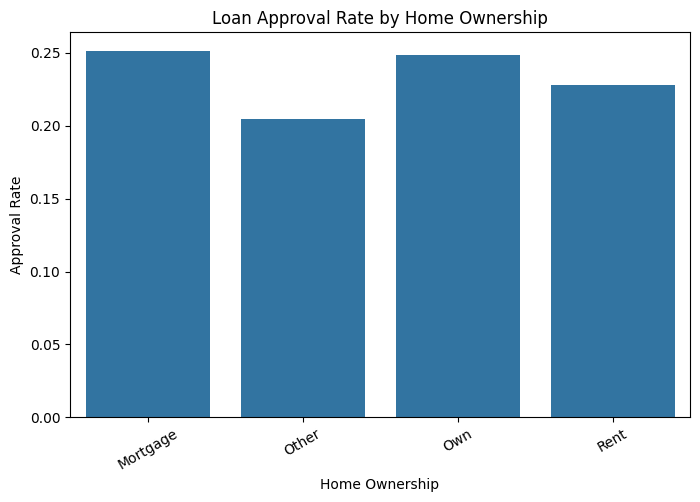

In [12]:
approval_rate=(data_df.groupby('HomeOwnershipStatus')['LoanApproved'].mean().reset_index())

plt.figure(figsize=(8,5))
sns.barplot(data=approval_rate,x='HomeOwnershipStatus',y='LoanApproved')
plt.title('Loan Approval Rate by Home Ownership')
plt.ylabel('Approval Rate')
plt.xlabel('Home Ownership')
plt.xticks(rotation=30)
plt.show()

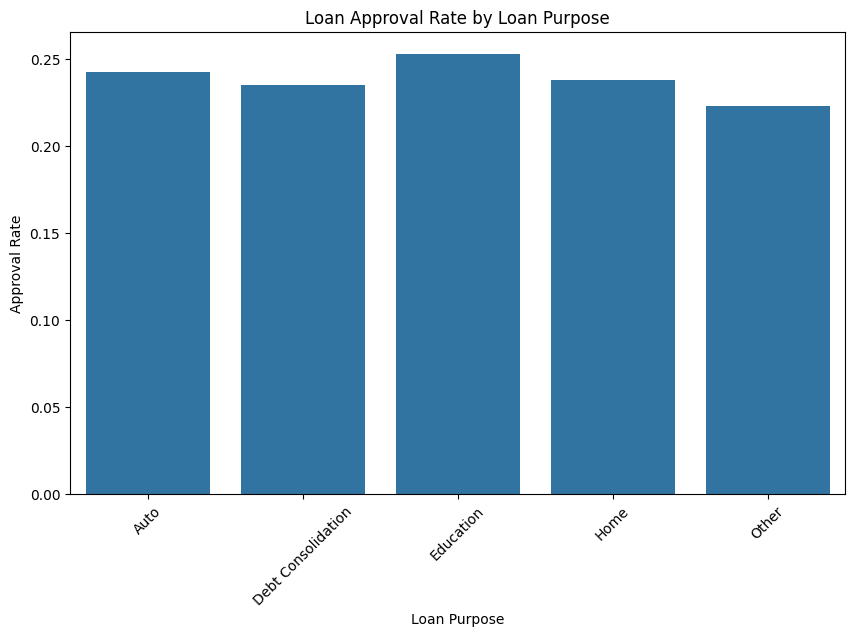

In [12]:
approval_purpose = (
    data_df.groupby('LoanPurpose')['LoanApproved'].mean().reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=approval_purpose,
    x='LoanPurpose',
    y='LoanApproved'
)
plt.title('Loan Approval Rate by Loan Purpose')
plt.ylabel('Approval Rate')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45)
plt.show()


#### 2. Impact of Different Factors like Credit Score, Debt-to-income ratio etc

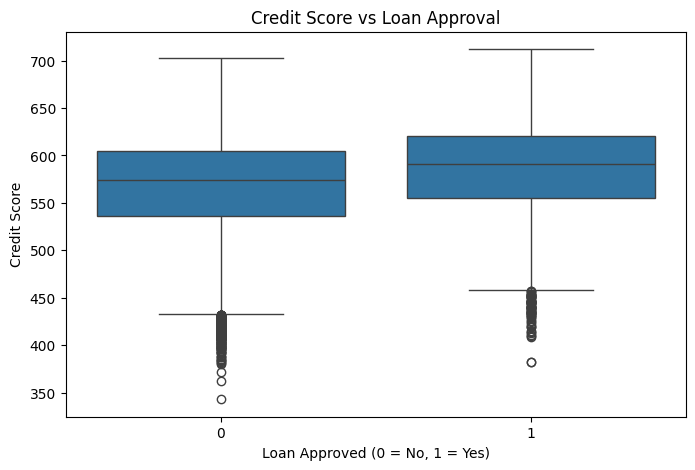

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='LoanApproved', y='CreditScore', data=data_df)
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Credit Score')
plt.title('Credit Score vs Loan Approval')
plt.show()


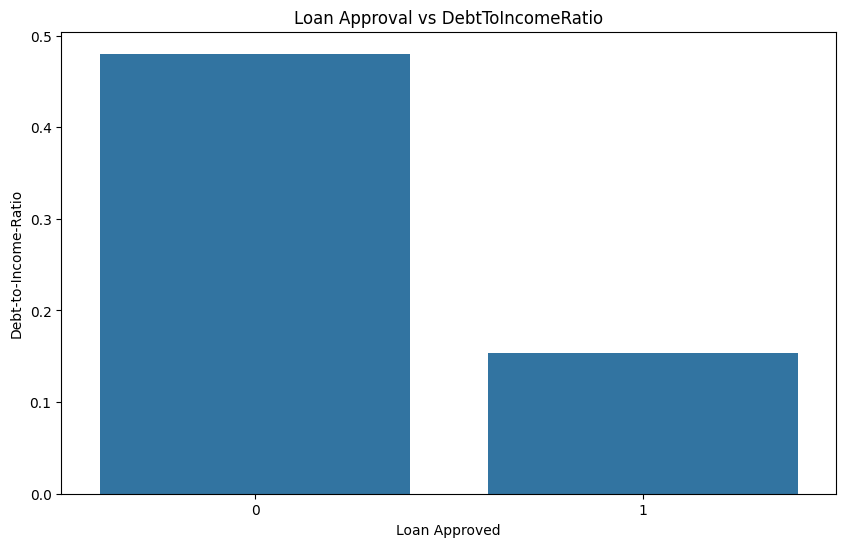

In [14]:
plt.figure(figsize=(10,6))
plt.title('Loan Approval vs DebtToIncomeRatio')
sns.barplot(x='LoanApproved',y='TotalDebtToIncomeRatio',data=data_df,errorbar=None)
plt.xlabel('Loan Approved')
plt.ylabel('Debt-to-Income-Ratio')
plt.show()

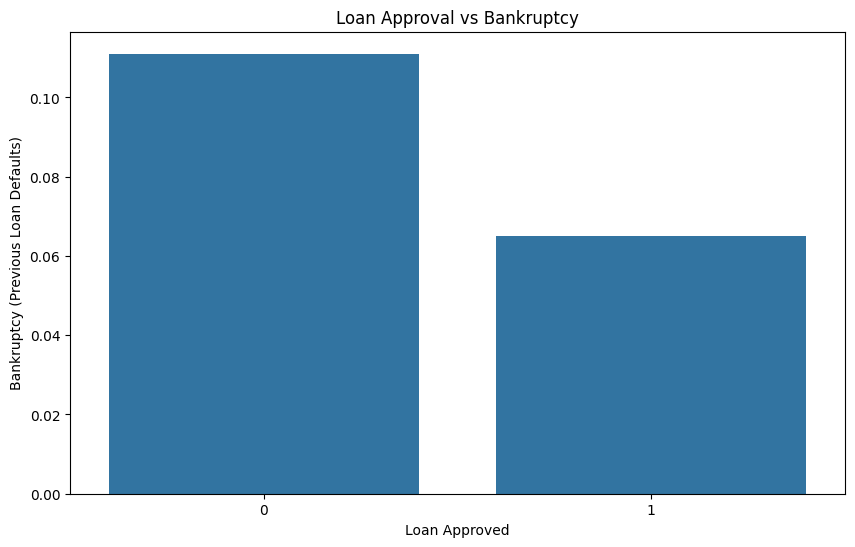

In [15]:
plt.figure(figsize=(10,6))
plt.title('Loan Approval vs Bankruptcy')
sns.barplot(data=data_df,x='LoanApproved',y='PreviousLoanDefaults',errorbar=None)
plt.xlabel('Loan Approved')
plt.ylabel('Bankruptcy (Previous Loan Defaults)')
plt.show()

#### 3.Correlation Heatmap

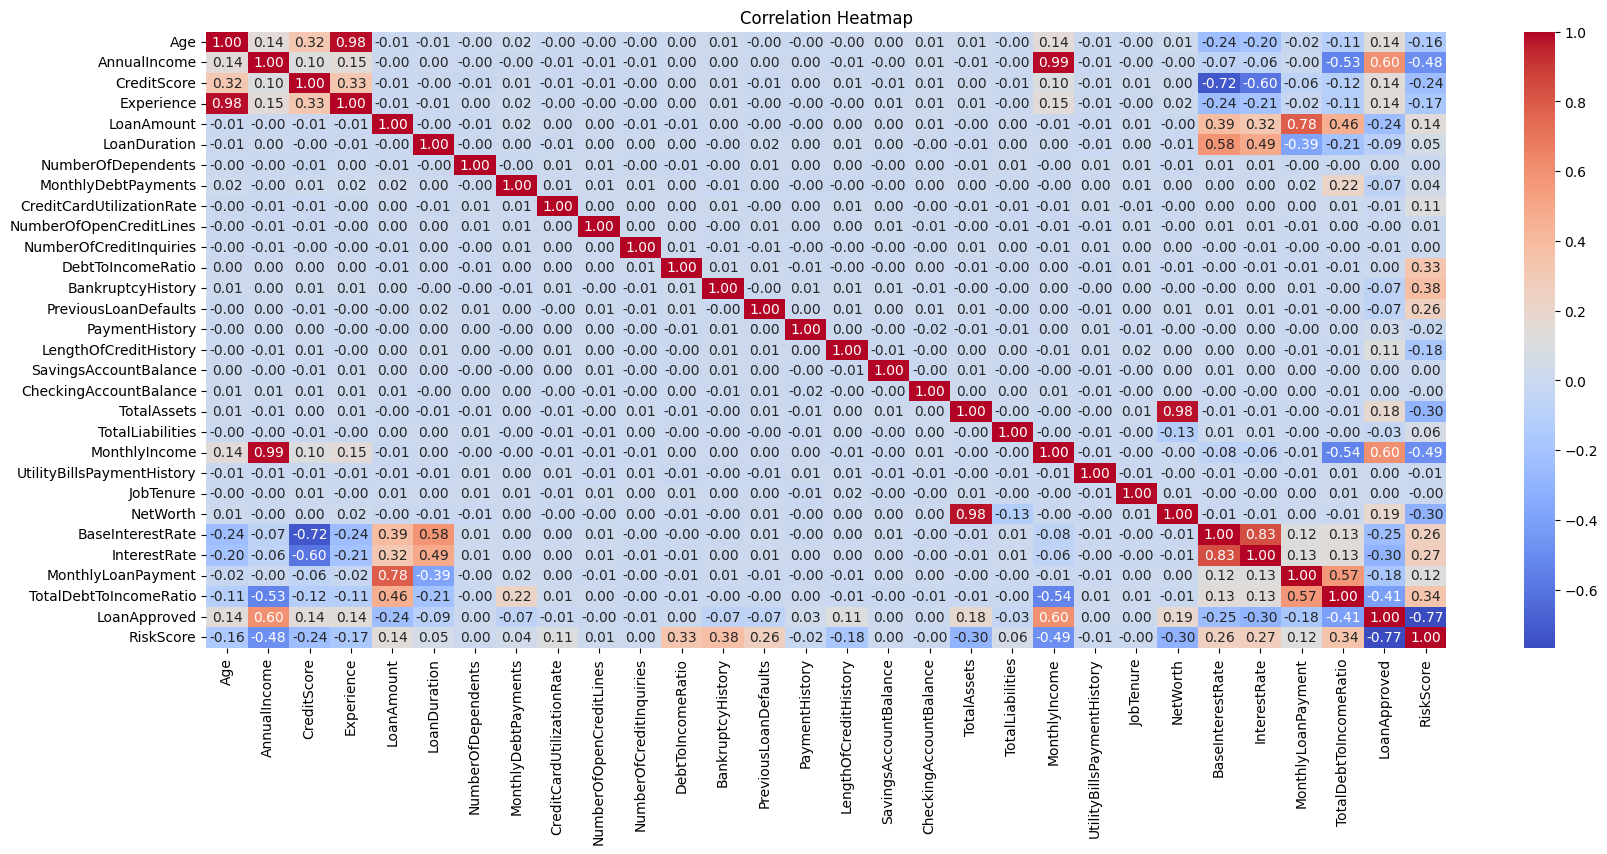

In [16]:
numerical_columns = data_df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(20,8))
sns.heatmap(data_df[numerical_columns].corr(),annot=True, fmt=".2f",cmap="coolwarm",cbar=True)
plt.title('Correlation Heatmap')
plt.show()


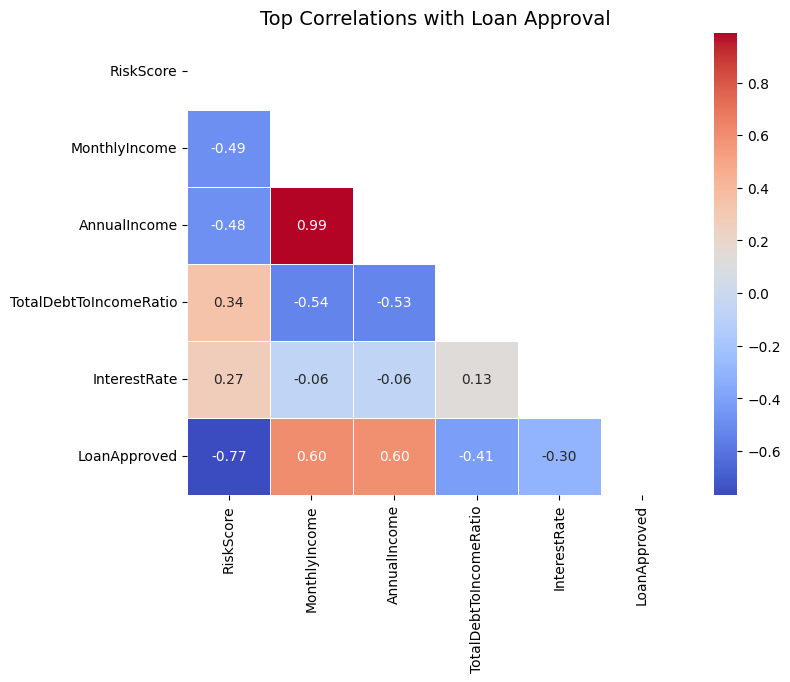

In [17]:
corr_matrix = data_df[numerical_columns].corr()
loan_corr = corr_matrix["LoanApproved"].sort_values(ascending=False)

top_features = loan_corr.drop("LoanApproved").abs().sort_values(ascending=False).head(5).index

highlight_corr = corr_matrix.loc[list(top_features)+["LoanApproved"], list(top_features)+["LoanApproved"]]

mask = np.triu(np.ones_like(highlight_corr, dtype=bool))

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(
    highlight_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    mask=mask,
    cbar=True,
    linewidths=0.5
)
plt.title("Top Correlations with Loan Approval", fontsize=14)
plt.show()


### Data Preprocessing (Outliers Removal and Encoding)
#### We replaced Outliers with the median value as removing them was reducing the dataset from 20k rows to 6k. Label Encoding for all object type columns as they have order except date, dropping that

In [19]:
def replace_outliers_iqr(df, columns):
    df_replaced = df.copy()
    
    for col in columns:
        df_replaced[col] = df_replaced[col].astype(float)

        Q1 = df_replaced[col].quantile(0.25)
        Q3 = df_replaced[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        median_val = df_replaced[col].median()
        df_replaced.loc[df_replaced[col] < lower_bound, col] = median_val
        df_replaced.loc[df_replaced[col] > upper_bound, col] = median_val
    
    return df_replaced

data_df_cleaned = replace_outliers_iqr(data_df, numerical_columns[:-2])


In [20]:
label_enc_cols = ['EducationLevel', 'EmploymentStatus', 'MaritalStatus','HomeOwnershipStatus', 'LoanPurpose'] ## label encoding for them as they have ordinal relationship
 
for col in label_enc_cols:
    le = LabelEncoder()
    data_df_cleaned[col] = le.fit_transform(data_df_cleaned[col])

In [21]:
data_df_cleaned

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948.0,617.0,0,4,22.0,13152.0,48.0,1,...,3329.000000,0.724972,5.0,126928.0,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38.0,39709.0,628.0,0,0,15.0,26045.0,48.0,2,...,3309.083333,0.935132,3.0,43609.0,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724.0,570.0,0,1,26.0,17627.0,36.0,1,...,3393.666667,0.872241,6.0,5205.0,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58.0,69084.0,545.0,0,3,34.0,37898.0,96.0,2,...,5757.000000,0.896155,5.0,99452.0,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37.0,103264.0,594.0,0,0,17.0,9184.0,36.0,1,...,8605.333333,0.941369,5.0,32855.5,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44.0,30180.0,587.0,0,3,19.0,24521.0,36.0,1,...,2515.000000,0.826217,1.0,55327.0,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56.0,49246.0,567.0,0,0,33.0,25818.0,36.0,1,...,4103.833333,0.816618,3.0,64002.0,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44.0,48958.0,645.0,0,1,20.0,37033.0,72.0,1,...,4079.833333,0.887216,3.0,103663.0,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60.0,41025.0,560.0,0,3,36.0,14760.0,72.0,1,...,3418.750000,0.843787,5.0,10600.0,0.249760,0.264873,411.168284,0.408678,0,59.0


### Model Training

In [22]:
data_df_cleaned.drop(columns=['ApplicationDate'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data_df_cleaned.drop(columns=['LoanApproved']),data_df_cleaned['LoanApproved'],test_size=0.3, shuffle=True,random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

In [25]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [26]:
results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Use scaled data for KNN, raw data for trees
    X_tr = X_train_scaled if name == "KNN" else X_train
    X_te = X_test_scaled if name == "KNN" else X_test
    
    # Cross-validation on training data (ROC-AUC)
    try:
        cv_scores = cross_val_score(model, X_tr, y_train, cv=cv, scoring='roc_auc')
        print(f"CV ROC-AUC scores: {cv_scores}")
        print(f"Mean CV ROC-AUC: {cv_scores.mean():.4f}")
    except ValueError as e:
        print(f"CV failed: {e}")
        cv_scores = None
    
    # Train model
    model.fit(X_tr, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:,1] if hasattr(model, "predict_proba") else None
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Classification report
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
    
    # ROC-AUC
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"Test ROC-AUC: {roc_auc:.4f}")
        
        # Precision-Recall AUC
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)
        print(f"Precision-Recall AUC: {pr_auc:.4f}")
    else:
        roc_auc = pr_auc = None
    
    # Save results
    results[name] = {
        "model": model,
        "cv_roc_auc": cv_scores,
        "confusion_matrix": cm,
        "classification_report": cr,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc
    }

print("\nAll models evaluated successfully.")


--- KNN ---
CV ROC-AUC scores: [0.96176862 0.96598166 0.96900135 0.9622542  0.96974423]
Mean CV ROC-AUC: 0.9658
Confusion Matrix:
[[4443   79]
 [ 320 1158]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4522
           1       0.94      0.78      0.85      1478

    accuracy                           0.93      6000
   macro avg       0.93      0.88      0.91      6000
weighted avg       0.93      0.93      0.93      6000

Test ROC-AUC: 0.9711
Precision-Recall AUC: 0.9446

--- Decision Tree ---
CV ROC-AUC scores: [0.97766214 0.98028887 0.98169074 0.97769328 0.98340063]
Mean CV ROC-AUC: 0.9801
Confusion Matrix:
[[4471   51]
 [  54 1424]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4522
           1       0.97      0.96      0.96      1478

    accuracy                           0.98      6000
   macro avg       0.98      0.98

In [52]:
data_df_cleaned['LoanApproved'].value_counts()

LoanApproved
0.0    20000
Name: count, dtype: int64